# Corizo Capstone Project 2

In [1]:
#importing necessary packages or libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import and Explore Data.

In [2]:
#loading CSV file

df = pd.read_csv('signal-data.csv')

In [3]:
#To get a preview of dataset

df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


**Time: A timestamp column, which seems to indicate when the data was recorded.**

**0 to 589: Likely sensor readings or measurements (most are float values, and some have missing data).**

**Pass/Fail: The target attribute indicating whether the result is a pass (1) or fail (-1)**

In [4]:
#To print total no of rows
rows = df.shape[0]
print("Total no of Rows:" , rows)

#To Print total no of columns
cols = df.shape[1]
print("Total no of Columns:" , cols)

Total no of Rows: 1567
Total no of Columns: 592


In [5]:
#To get info (rows , columns, datatypes)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


**From the above info we can see that there is a 1567 total no of rows and 592 total no of columns entries.**

**We have total 592 entries from those 590 column has float64 , 1 column has int64 and 1 column has object datatype.**

# 2. Data Cleaning.

In [6]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [7]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour * 3600 + \
                                pd.to_datetime(df['Time'], errors='coerce').dt.minute * 60 + \
                                pd.to_datetime(df['Time'], errors='coerce').dt.second

# Check the first few rows after conversion
print(df['Time'].head())

# Check the datatype
print(df['Time'].dtype)

0    42900
1    45120
2    47820
3    52980
4    55320
Name: Time, dtype: int32
int32


In [8]:
# To print count of null values for each column

#df.isnull().sum().sort_values(ascending = False)
null_counts = df.isnull().sum().sort_values(ascending = False)
print(null_counts)

158          1429
292          1429
293          1429
157          1429
85           1341
             ... 
386             0
361             0
360             0
359             0
Pass/Fail       0
Length: 592, dtype: int64


In [9]:
# Checking percentage of missing values in each column
missing_values = df.isnull().mean() * 100

# Display columns with missing values over a threshold (e.g., 20%)
missing_over_threshold = missing_values[missing_values > 20]
print(missing_over_threshold)

72     50.670070
73     50.670070
85     85.577537
109    64.964901
110    64.964901
111    64.964901
112    45.628590
157    91.193363
158    91.193363
220    85.577537
244    64.964901
245    64.964901
246    64.964901
247    45.628590
292    91.193363
293    91.193363
345    50.670070
346    50.670070
358    85.577537
382    64.964901
383    64.964901
384    64.964901
385    45.628590
492    85.577537
516    64.964901
517    64.964901
518    64.964901
519    45.628590
578    60.561583
579    60.561583
580    60.561583
581    60.561583
dtype: float64


In [10]:
# Dropping columns with more than 50% missing values
columns_to_drop = missing_values[missing_values > 50].index
data_cleaned = df.drop(columns=columns_to_drop)

# Checking remaining missing values
remaining_missing = data_cleaned.isnull().sum().sum()
print(f"Remaining missing values: {remaining_missing}")

Remaining missing values: 11683


In [11]:
# Mean immputation in place of null values.

data_cleaned_imputed = data_cleaned.fillna(data_cleaned.median())

In [12]:
# Saving the cleaned dataset for further analysis

data_cleaned_imputed.to_csv('cleaned_dataset.csv', index=False)

In [13]:
data_cleaned_imputed.head()

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,42900,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,45120,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,47820,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,52980,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,55320,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [14]:
data_cleaned_imputed.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 564, dtype: int64

In [15]:
data_cleaned_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,1567.0,44177.919592,24759.279799,60.0000,22260.00000,44940.0000,65520.0000,86340.0000
0,1567.0,3014.441551,73.480841,2743.2400,2966.66500,3011.4900,3056.5400,3356.3500
1,1567.0,2495.866110,80.228143,2158.7500,2452.88500,2499.4050,2538.7450,2846.4400
2,1567.0,2200.551958,29.380973,2060.6600,2181.09995,2201.0667,2218.0555,2315.2667
3,1567.0,1395.383474,439.837330,0.0000,1083.88580,1285.2144,1590.1699,3715.0417
...,...,...,...,...,...,...,...,...
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.0276,0.1028
587,1567.0,0.016474,0.008805,0.0032,0.01060,0.0148,0.0203,0.0799
588,1567.0,0.005283,0.002866,0.0010,0.00330,0.0046,0.0064,0.0286
589,1567.0,99.652345,93.864558,0.0000,44.36860,71.9005,114.7497,737.3048


**Now we have done with our data cleaning part in which we do check for null values and maximum null value column.**

**From the above we seen that there is a 1341 null values and there are 4 column which have maximum number of null values**

**After that we drop the column which have maximum null values also we drop some of duplicates.**

**And further to treat with null values we used mean imputation method and check after that we don't have any null values in our data.**

**In info we seen that there is one column of object datatype so we have drop that one column as its not much necessary and does not affect in the process of model building**

**we can see the statistical summary of each column of our data using .describe() method**

**Now we can start with our data visualization for in-depth understanding of our data**



# 3.Data Analysis and Visualization

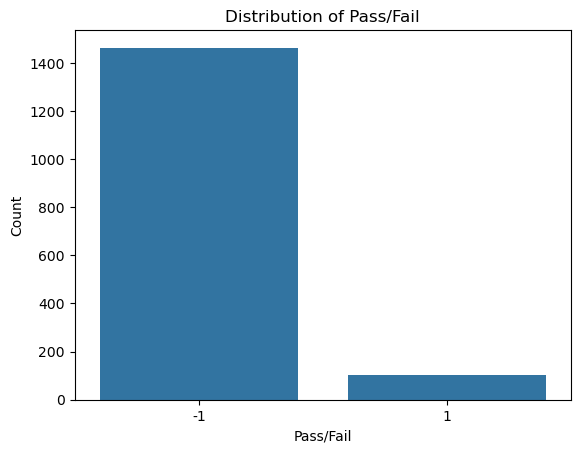

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of Pass/Fail distribution
sns.countplot(x='Pass/Fail', data=data_cleaned_imputed)
plt.title('Distribution of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

**Pass/Fail: The target attribute indicating whether the result is a pass (1) or fail (-1).**

**By the above box plot we seen there is more than 1400 count of fail(-1) and less than 200 count of pass(1)**

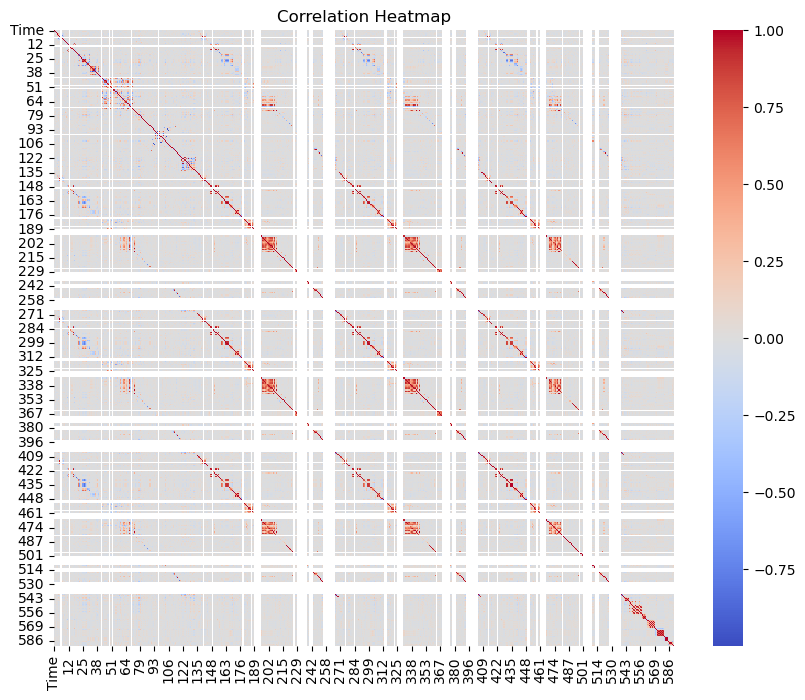

In [17]:
# Compute the correlation matrix
corr_matrix = data_cleaned_imputed.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**Darker shades (e.g., dark blue or red) indicate strong positive or negative correlations, while lighter shades (e.g., white or yellow) suggest weaker or no correlation.**

**In above we see some diagonal features have red shade means they have positive correlation between them while some of then shows liitle blue shade means also have negative correlation amonf some features.**

**While we see most of white in the heatmap means there is also no correlation between some features of dataset.**

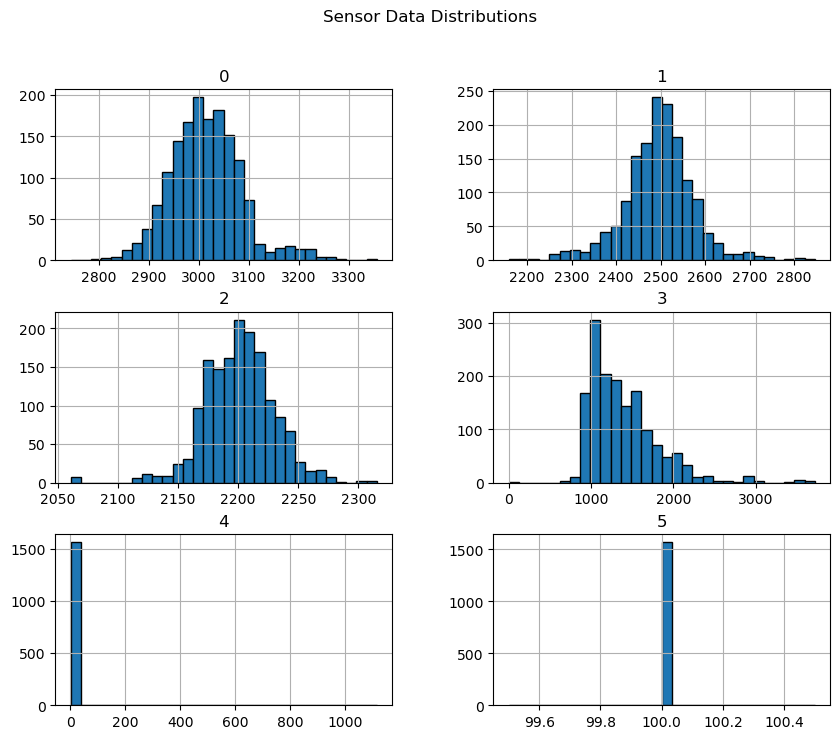

In [18]:
# Unvariate Analysis
# Histograms of selected sensor columns

sensor_cols = ['0', '1', '2', '3', '4', '5']
data_cleaned_imputed[sensor_cols].hist(figsize=(10,8), bins=30, edgecolor='black')
plt.suptitle('Sensor Data Distributions')
plt.show()

**From the above histplot of selescted columns we see that each column is differently distributed in nature means some are normally distributed some are left-skewed and some are right-skewed where as some columns are not much distributed.**

**First 3 columns are somewhat normally distributed and 4 column is right-skewed and last 2 columns don't shows any distribution**

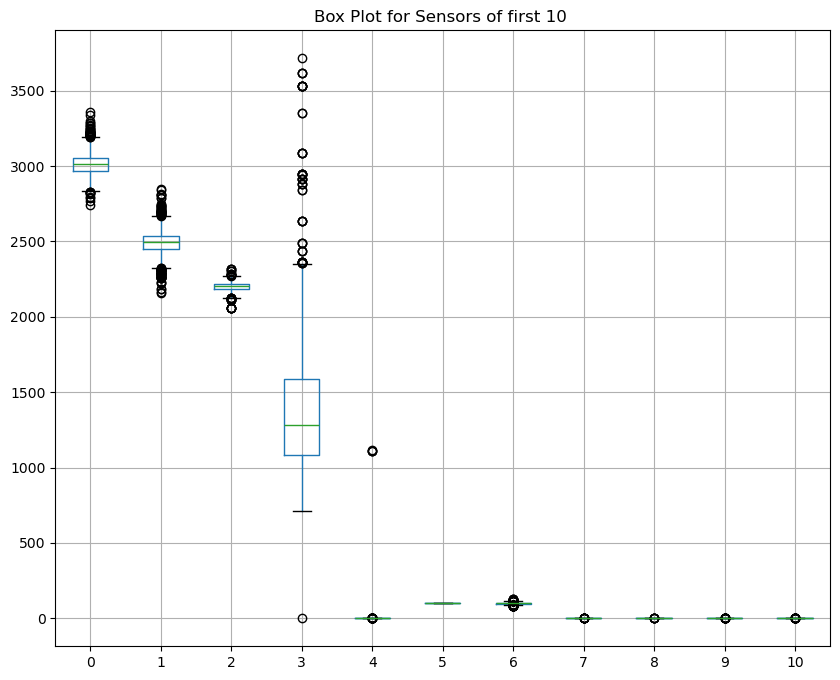

In [19]:
# Boxplot to detect Outliers
# Box plot for a specific sensor column (e.g., '0')

sensor_cols = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9', '10']
data_cleaned_imputed[sensor_cols].boxplot(figsize=(10,8))#sns.boxplot(x=data_cleaned_imputed['0', '1', '2', '3'])
plt.title('Box Plot for Sensors of first 10 ')
plt.show()


**Above is the boxplot for the first 10 columns of our data.**

**In the first 3 column plots the outliers are at the both side i.e maximum and minimum. whereas 4 column plot have maximum outliers at maximun side and also have broader inter quartile range(IQR).**

**After that column has so minimum distance in IQR and does not have maximum outliers**

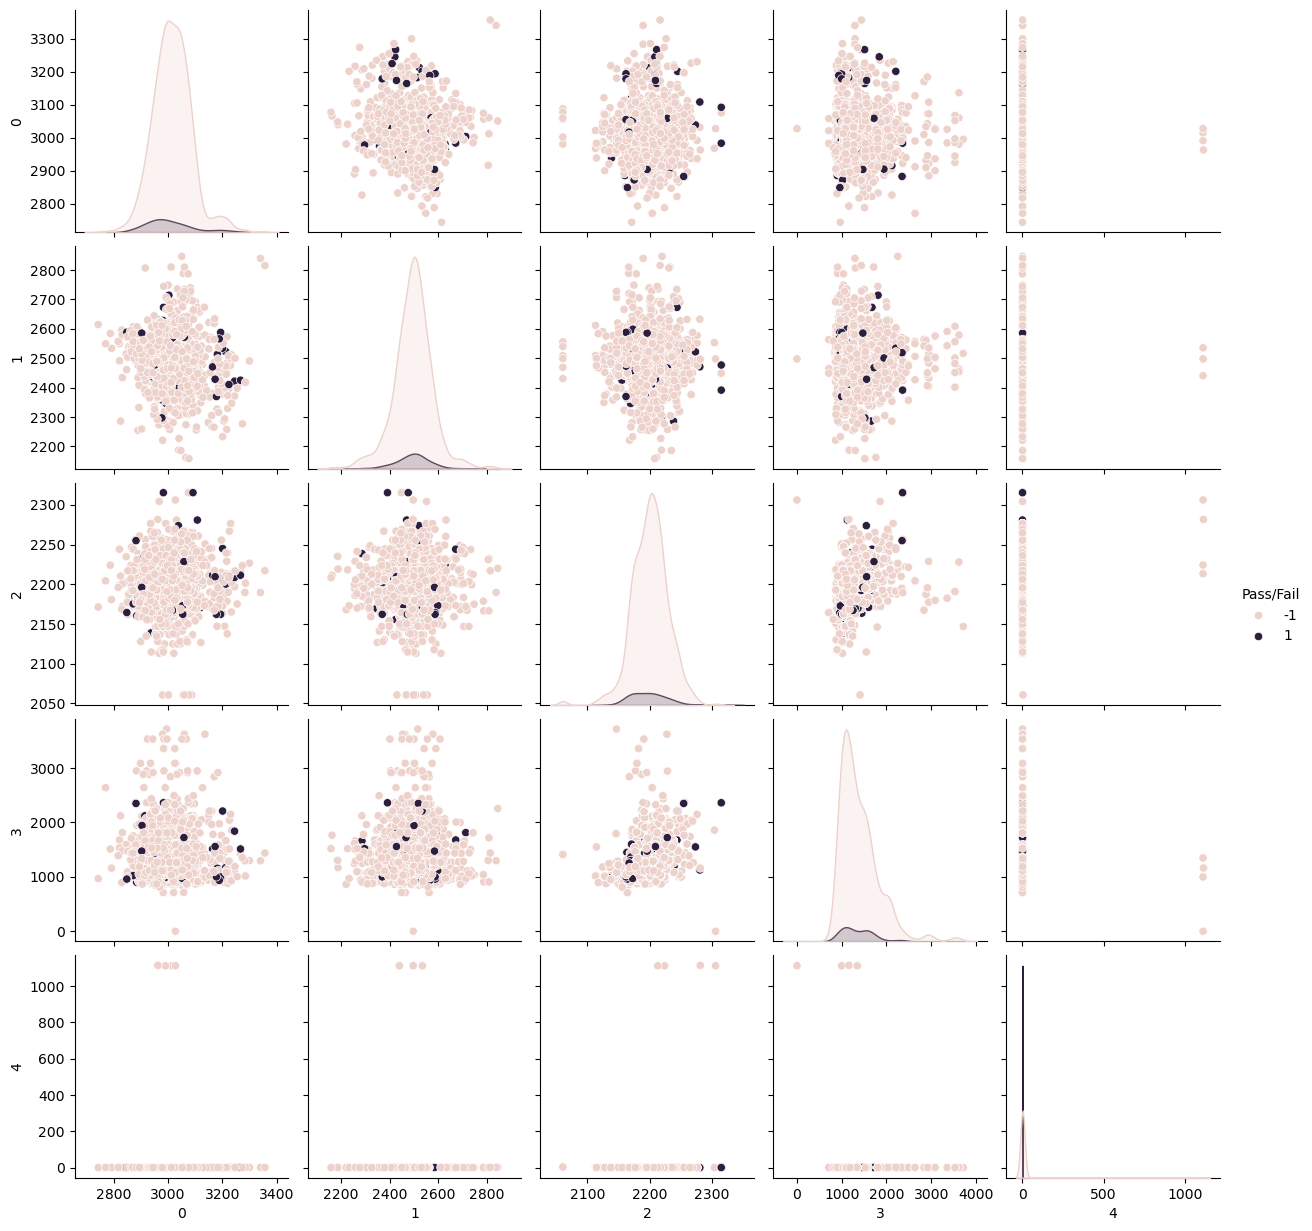

In [20]:
# Bivariate Analysis
# Pairplot for selected features and target variable

sns.pairplot(data_cleaned_imputed[['0', '1', '2','3','4', 'Pass/Fail']], hue='Pass/Fail')
plt.show()

**The above pairplot shows relationship between each pair of variables and scatteredness of the dataset.**

**In the 4th no of column there is zero relation between variables.**

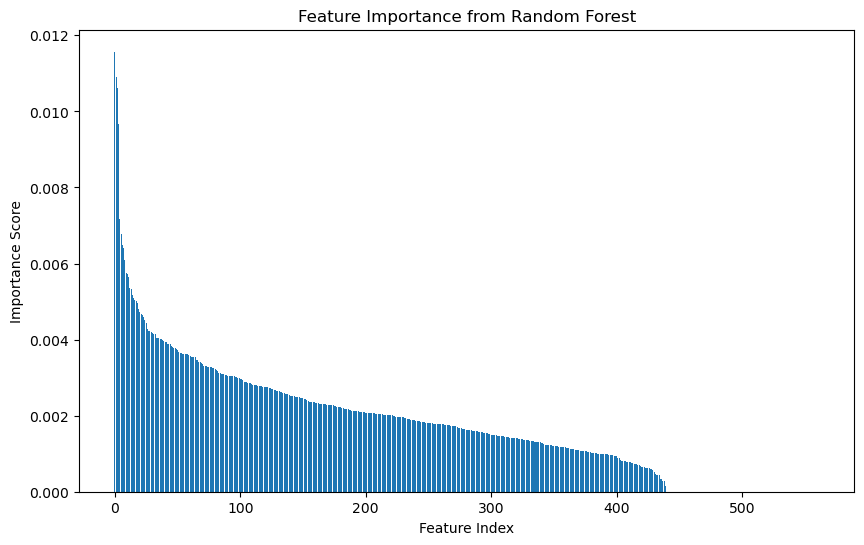

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Separate predictors and target
X = data_cleaned_imputed.drop(columns=['Pass/Fail', 'Time'])  # Drop 'Pass/Fail' and irrelevant 'Time' column
y = data_cleaned_imputed['Pass/Fail']

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Plot feature importance
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]  # Sort feature importances in descending order
plt.figure(figsize=(10, 6))
plt.title('Feature Importance from Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()


**The bar plot shows how significant each feature is in predicting the target variable (Pass/Fail).The higher the importance score for a feature, the more the model relies on it when making decisions.**

**The features on the left of the plot (with the highest bars) are the most influential in determining whether a sample passes or fails. In contrast, features on the right (with lower bars) have little to no influence on the prediction.**

# 4.Data Pre-processing

In [22]:
# Seperating predictors and target variable
# Dropping irrelevant columns like 'Time' and separating features and target

X = data_cleaned_imputed.drop(columns=['Pass/Fail', 'Time'])  # Features (predictors)
y = data_cleaned_imputed['Pass/Fail']  # Target variable

In [23]:
#Handling imbalance data using SMOTE

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print(y_balanced.value_counts())

Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64


In [24]:
#Train-Test Data split

from sklearn.model_selection import train_test_split

# Split the balanced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Check the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (2048, 562)
X_test shape: (878, 562)


In [25]:
#Sacaling Data using standardization

from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the first few rows of the scaled data
print(X_train_scaled[:5])


[[ 0.64919058 -0.38492786 -1.29861523 ... -0.01815681 -0.11379515
  -0.30043912]
 [-0.50745824  0.83815985  0.19464165 ...  0.79974611  1.22801929
   0.57947244]
 [ 1.15951666  0.74611204  1.24110781 ... -0.08864705  0.12517612
  -0.59436998]
 [-0.64576075 -0.18246615  1.06788198 ... -0.99985197 -0.99455692
  -0.29918827]
 [-0.5418358   1.83225099 -0.53629948 ...  4.39098614  3.34872358
   1.00190315]]


In [26]:
# Create a DataFrame to store statistics
stats_comparison = pd.DataFrame()

# Original dataset statistics
stats_comparison['Original_Mean'] = X.mean()
stats_comparison['Original_Std'] = X.std()

# Training dataset statistics
stats_comparison['Train_Mean'] = X_train.mean()
stats_comparison['Train_Std'] = X_train.std()

# Test dataset statistics
stats_comparison['Test_Mean'] = X_test.mean()
stats_comparison['Test_Std'] = X_test.std()

# Show the statistics comparison
print(stats_comparison)

     Original_Mean  Original_Std   Train_Mean   Train_Std    Test_Mean  \
0      3014.441551     73.480841  3009.096043   71.266016  3005.983758   
1      2495.866110     80.228143  2496.274514   70.617211  2496.938391   
2      2200.551958     29.380973  2200.211562   27.042964  2199.967629   
3      1395.383474    439.837330  1370.283358  372.629409  1391.747597   
4         4.171281     56.103721     2.937935   42.525883     2.586713   
..             ...           ...          ...         ...          ...   
585       3.067628      3.576899     3.124552    3.178005     2.947965   
586       0.021458      0.012354     0.021675    0.011262     0.021369   
587       0.016474      0.008805     0.017114    0.008060     0.016741   
588       0.005283      0.002866     0.005475    0.002598     0.005377   
589      99.652345     93.864558    99.165109   79.507292    98.725440   

       Test_Std  
0     71.161993  
1     73.370931  
2     27.553904  
3    374.174059  
4     37.501058  
.. 

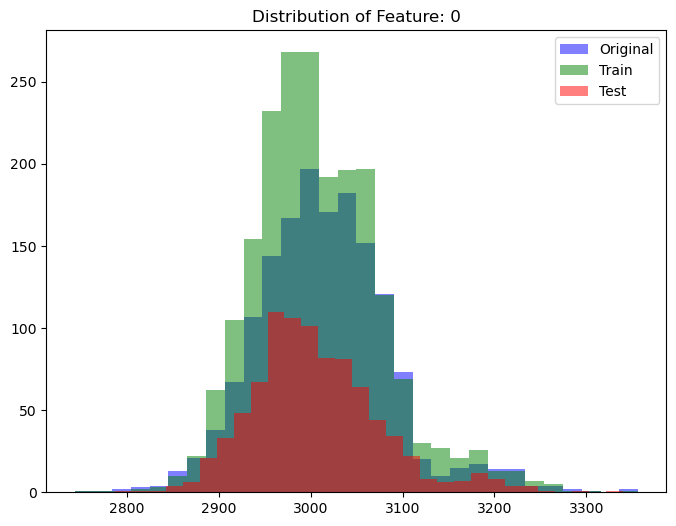

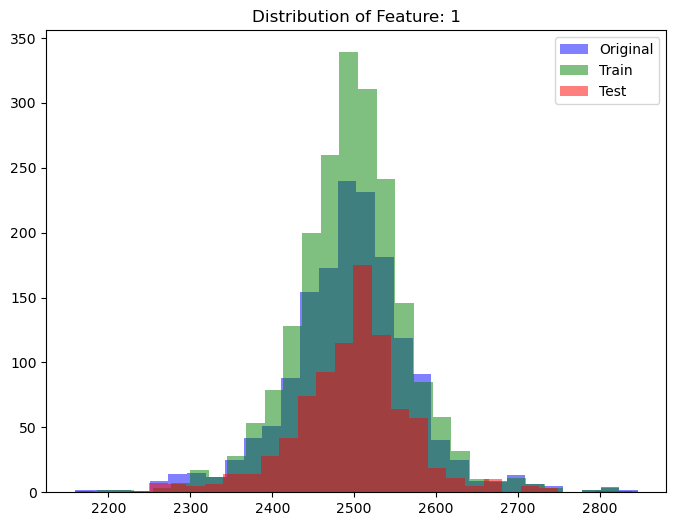

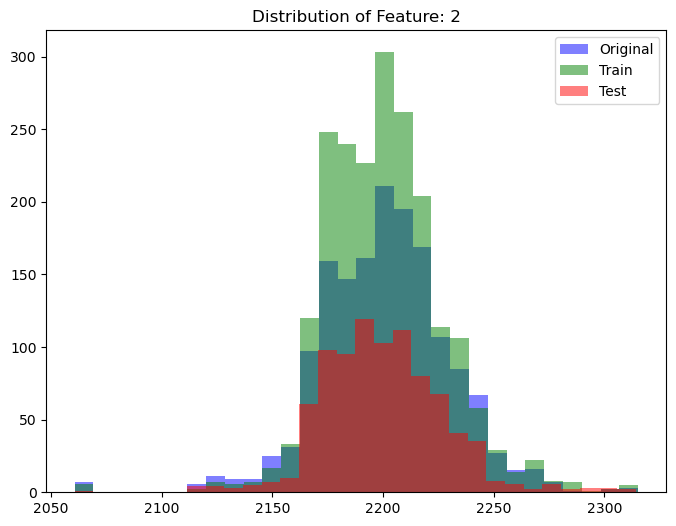

In [27]:
import matplotlib.pyplot as plt

# Plot histograms for a few sample features
feature_cols = ['0', '1', '2']  # Replace with actual feature names

for feature in feature_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(X[feature], bins=30, alpha=0.5, label='Original', color='blue')
    plt.hist(X_train[feature], bins=30, alpha=0.5, label='Train', color='green')
    plt.hist(X_test[feature], bins=30, alpha=0.5, label='Test', color='red')
    plt.title(f'Distribution of Feature: {feature}')
    plt.legend()
    plt.show()


**After completing Data pre-processing steps we create a seperate dataset for statistical comparison of original datatset versus train and test data.**

**And from above we see the mean of train and test data is nearly same as compared to original data i.e 301.**

**Same as mean the standard deviation of train and original data is nearly same whereas for test data it is slightly changes by some difference.**

**After that we plotted histogram of first 3 features to see the distribution of original data versus train and test data.**

# 5.Model training, testing and tuning:

In [28]:
# Importing necessary packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

**a) Random Forest Classifier**

In [29]:
# Initialize RandomForest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(f'Random Forest CV Accuracy: {rf_cv_scores.mean()}')

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict on the test set
rf_y_pred = rf.predict(X_test_scaled)

# Evaluate the performance
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_y_pred))


Random Forest CV Accuracy: 0.9809577196016459
Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       449
           1       0.99      1.00      0.99       429

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



**From the above classification report, Random Forest Classifier gives 0.98 of CV accuracy and 0.99 of  F-1 Score**

**b) SVM Classifier**

In [30]:
# Initialize SVM Classifier
svm = SVC(random_state=42)

# Perform cross-validation
svm_cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)
print(f'SVM CV Accuracy: {svm_cv_scores.mean()}')

# Train the model
svm.fit(X_train_scaled, y_train)

# Predict on the test set
svm_y_pred = svm.predict(X_test_scaled)

# Evaluate the performance
print('SVM Classification Report:')
print(classification_report(y_test, svm_y_pred))


SVM CV Accuracy: 0.9882807561571948
SVM Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       449
           1       0.98      1.00      0.99       429

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



**From the above classification report of SVM Classifier, it gives the CV accuracy is 0.98 and f-1 score is 0.99 which is same as Random Forest Classifier**

**c) Naive Baiyes Classifier**

In [31]:
# Initialize Naive Bayes Classifier
nb = GaussianNB()

# Perform cross-validation
nb_cv_scores = cross_val_score(nb, X_train_scaled, y_train, cv=5)
print(f'Naive Bayes CV Accuracy: {nb_cv_scores.mean()}')

# Train the model
nb.fit(X_train_scaled, y_train)

# Predict on the test set
nb_y_pred = nb.predict(X_test_scaled)

# Evaluate the performance
print('Naive Bayes Classification Report:')
print(classification_report(y_test, nb_y_pred))


Naive Bayes CV Accuracy: 0.6000679825869163
Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.17      0.29       449
           1       0.53      0.99      0.69       429

    accuracy                           0.57       878
   macro avg       0.74      0.58      0.49       878
weighted avg       0.75      0.57      0.49       878



**Whereas from above Naive Bayes classification report have the CV accuracy of 0.60 and f-1 score is 0.58 which is very low as compared to Random Forest Classifier and SVM classifier**

**d) Hyperparameter Tuning using GridSearchCV**

In [32]:
# Define the hyperparameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f'Best Random Forest Params: {rf_grid.best_params_}')
print(f'Best Random Forest CV Score: {rf_grid.best_score_}')


Best Random Forest Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest CV Score: 0.9877929512791461


In [33]:
# Define the hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV for SVM
svm_grid = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5)
svm_grid.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f'Best SVM Params: {svm_grid.best_params_}')
print(f'Best SVM CV Score: {svm_grid.best_score_}')


Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM CV Score: 0.9926757707674877


**For Hyperparameter Tuning we used GridSearchCV.**

**From above Hyperparameter tuning we see that Random Forest CV Score is 0.98 whereas SVM CV Score is 0.99 which shows that SVM Classifier is more reliable and robust estimate of a model’s performance.**

In [34]:
# Display model comparison
models = {
    "Random Forest": rf_grid,
    "SVM": svm_grid,
    "Naive Bayes": nb
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Test Accuracy: {accuracy}')
    print(f'{name} Classification Report:\n', classification_report(y_test, y_pred))


Random Forest Test Accuracy: 0.9954441913439636
Random Forest Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      1.00       449
           1       0.99      1.00      1.00       429

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878

SVM Test Accuracy: 0.9943052391799544
SVM Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      0.99       449
           1       0.99      1.00      0.99       429

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878

Naive Bayes Test Accuracy: 0.571753986332574
Naive Bayes Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.17      0.29       449
    

**In the above classification report of models i.e Random Forest, SVM and Naive Bayes, it is clearly shows that Random Forest and SVM  gives 0.99 test accuracy while Naive Bayes gives 0.57 test accuracy**

**To deciced which is best suited model for our dataset we need to take light on various other factors than accuracy.**

**There are various factors to consider:**

**1. Training time and scalability, Random Forest: It tends to be faster to train on large datasets, especially if you parallelize the computation across multiple cores.**
**On the other hand SVMs, particularly with non-linear kernels, can become computationally expensive on large datasets.** 

**2. Handling imbalanced data, Random Forest: Tends to handle imbalanced data better because it can balance the data within each decision tree.** 
**SVM: SVMs can struggle with imbalanced data, especially if not tuned properly.**

**3. Outliers and noise toleranace, Random Forest: Random Forest is quite robust to outliers and noise because each tree in the ensemble is built on a random subset of the data, so no single outlier can significantly influence the model.** 
**SVM: SVMs can be sensitive to outliers since the algorithm tries to maximize the margin between support vectors (data points closest to the decision boundary).** 

**4. Memory usage, Random Forest: Needs to store multiple trees, which can take up considerable memory, especially if the number of trees and features is large.**
**SVM: In comparison, SVMs typically require less memory, especially with a linear kernel, because they focus on a few support vectors rather than memorizing the entire dataset.**

**5. Overfitting Risk, Random Forest: Less prone to overfitting, as it reduces variance by averaging many trees (ensemble learning).**
**SVM: SVMs can have a higher risk of overfitting, especially with non-linear kernels and poor hyperparameter tuning (like choosing the wrong C or gamma value).**

**6. Hyperparameter Tunning, Random Forest: Requires tuning for parameters such as the number of trees (n_estimators), maximum tree depth (max_depth), and minimum samples for splits.** 
**SVM: SVM can be sensitive to hyperparameters like the kernel type, regularization parameter C, and kernel coefficient gamma.**

**From training, testing CV accuracy, classification report and by considering all this factors we are conclude and going with the Random Forest Classifier Mode over SVM Classifier**

In [35]:
#Saving the best model

import joblib

# Save the best model 
joblib.dump(rf_grid.best_estimator_, 'best_random_forest_model.pkl')

# Load the model 
model = joblib.load('best_random_forest_model.pkl')


## Conclusion:

**Random Forest is generally preferred for larger datasets, high interpretability, and robustness against noise, outliers, and imbalanced data. It is also faster to train and easier to interpret. Want a more versatile, interpretable, and scalable model, Random Forest is the better choice.**

**SVM might be the better option for working with a smaller dataset, need better memory efficiency, or are working with high-dimensional, sparse data (especially text classification).**